In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas

2023-11-22 11:51:27.945823: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-22 11:51:27.972070: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
train_file = "../train.tsv"
test_file = "../test.tsv"

train_data = pandas.read_csv(train_file, delimiter='\t').to_numpy()
train_data2 = np.empty((train_data.shape[0], train_data.shape[1]-2))
train_data2[:, 0:] = train_data[:, 2:]
train_data2[:,0:1] = train_data2[:,0:1] / 4.0   #季節を0～1に正規化
train_data2[:,2:3] = train_data2[:, 2:3] / 6.0 #月を0～2に正規化
train_data2[:,3:4] = train_data2[:, 3:4] * 10 / 11.5 #時間を0～2に正規化
train_data2[:,5:6] = train_data2[:,5:6] / 6.0   #曜日を0～1に正規化
train_data2[:,7:8] = train_data2[:,7:8] / 4.0   #天気を0～1に正規化
train_data2 = train_data2#.astype(np.float32)
rnd = np.random.default_rng()
rnd.shuffle(train_data2,axis=0)

test_data = pandas.read_csv(test_file, delimiter='\t').to_numpy()
test_data2 = np.empty((test_data.shape[0], test_data.shape[1]-2))
test_data2[:, 0:] = test_data[:, 2:]
test_data2[:,0:1] = test_data2[:,0:1] / 4.0   #季節を0～1に正規化
test_data2[:,2:3] = test_data2[:, 2:3] / 6.0 #月を0～2に正規化
test_data2[:,3:4] = test_data2[:, 3:4] / 11.5 #時間を0～2に正規化
test_data2[:,5:6] = test_data2[:,5:6] / 6.0   #曜日を0～1に正規化
test_data2[:,7:8] = test_data2[:,7:8] / 4.0   #天気を0～1に正規化
test_data2 = test_data2.astype(np.float32)

display(train_data2)
display(test_data2)

x = train_data2[:, 12:]
x = x.reshape(x.shape[0], 1)
#print(x)
y = train_data2[:, :12]
y = y.reshape(y.shape[0], y.shape[1], 1)
#print(y)
test_y = test_data2.reshape(test_data2.shape[0], test_data2.shape[1], 1)
z = test_data2[:, :12]
z = z.reshape(z.shape[0], z.shape[1], 1)

array([[2.50000000e-01, 0.00000000e+00, 5.00000000e-01, ...,
        5.00000000e-01, 2.53700000e-01, 2.28000000e+02],
       [1.00000000e+00, 0.00000000e+00, 1.66666667e+00, ...,
        7.60000000e-01, 0.00000000e+00, 3.15000000e+02],
       [2.50000000e-01, 0.00000000e+00, 1.66666667e-01, ...,
        5.50000000e-01, 4.47800000e-01, 3.30000000e+01],
       ...,
       [5.00000000e-01, 0.00000000e+00, 8.33333333e-01, ...,
        8.30000000e-01, 1.64200000e-01, 2.00000000e+01],
       [5.00000000e-01, 0.00000000e+00, 8.33333333e-01, ...,
        5.60000000e-01, 0.00000000e+00, 2.26000000e+02],
       [2.50000000e-01, 0.00000000e+00, 5.00000000e-01, ...,
        4.90000000e-01, 3.58200000e-01, 1.95000000e+02]])

array([[0.25      , 1.        , 0.16666667, ..., 0.3788    , 0.66      ,
        0.        ],
       [0.25      , 1.        , 0.16666667, ..., 0.3485    , 0.66      ,
        0.1343    ],
       [0.25      , 1.        , 0.16666667, ..., 0.3485    , 0.76      ,
        0.        ],
       ...,
       [0.25      , 1.        , 2.        , ..., 0.2576    , 0.6       ,
        0.1642    ],
       [0.25      , 1.        , 2.        , ..., 0.2727    , 0.56      ,
        0.1343    ],
       [0.25      , 1.        , 2.        , ..., 0.2727    , 0.65      ,
        0.1343    ]], dtype=float32)

In [3]:
length_of_sequence = y.shape[1]
#print(length_of_sequence)
in_out_neurons = 1 #入出力ノード数
n_hidden = 1024  #隠れ層 -> 数が多い程，学習モデルの複雑さが増加 #増やした

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])

2023-11-22 11:51:30.145848: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-22 11:51:30.158292: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-22 11:51:30.158329: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-22 11:51:30.161071: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-22 11:51:30.161100: I tensorflow/compile

In [4]:
y.shape

(8645, 12, 1)

In [19]:
ES = EarlyStopping(mode='auto', patience=32)
model.fit(y, x,
          batch_size=8, #デフォは32
          epochs=512, #512epochで学習
          validation_split=0.2, #学習データの5%をvalidationに用いる
          callbacks=[ES]
          )

Epoch 1/512


2023-11-22 11:51:33.645494: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2023-11-22 11:51:34.340446: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-22 11:51:34.360313: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fd75828af00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-22 11:51:34.360384: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2023-11-22 11:51:34.364375: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-22 11:51:34.437723: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

865/865 [==============================] - 8s 6ms/step - loss: 18666.9570 - accuracy: 0.0129 - val_loss: 17773.0781 - val_accuracy: 0.0116
Epoch 2/512
865/865 [==============================] - 4s 5ms/step - loss: 17957.4961 - accuracy: 0.0129 - val_loss: 17775.5254 - val_accuracy: 0.0116
Epoch 3/512
865/865 [==============================] - 5s 5ms/step - loss: 17985.1348 - accuracy: 0.0129 - val_loss: 17906.0332 - val_accuracy: 0.0116
Epoch 4/512
865/865 [==============================] - 5s 5ms/step - loss: 16910.1602 - accuracy: 0.0129 - val_loss: 15674.2529 - val_accuracy: 0.0116
Epoch 5/512
865/865 [==============================] - 5s 5ms/step - loss: 15350.6602 - accuracy: 0.0129 - val_loss: 11999.3477 - val_accuracy: 0.0116
Epoch 6/512
865/865 [==============================] - 5s 5ms/step - loss: 12217.8994 - accuracy: 0.0129 - val_loss: 10051.0820 - val_accuracy: 0.0116
Epoch 7/512
865/865 [==============================] - 5s 5ms/step - loss: 10455.2363 - accuracy: 0.0129 -

In [20]:
predicted = model.predict(y,batch_size=32)
model.evaluate(y,x,batch_size=32)

 94/271 [=========>....................] - ETA: 0s

271/271 [==============================] - 1s 3ms/step - loss: 745.2059 - accuracy: 0.0119


[745.2058715820312, 0.011914401315152645]

In [21]:
r2 = 1 -  np.sum((predicted - x)**2) / np.sum((x - np.mean(x))**2)
print(r2)

0.9583679123515886


In [22]:
predicted

array([[ 14.284604],
       [294.50308 ],
       [ 11.171852],
       ...,
       [294.16702 ],
       [ 21.674328],
       [181.08289 ]], dtype=float32)

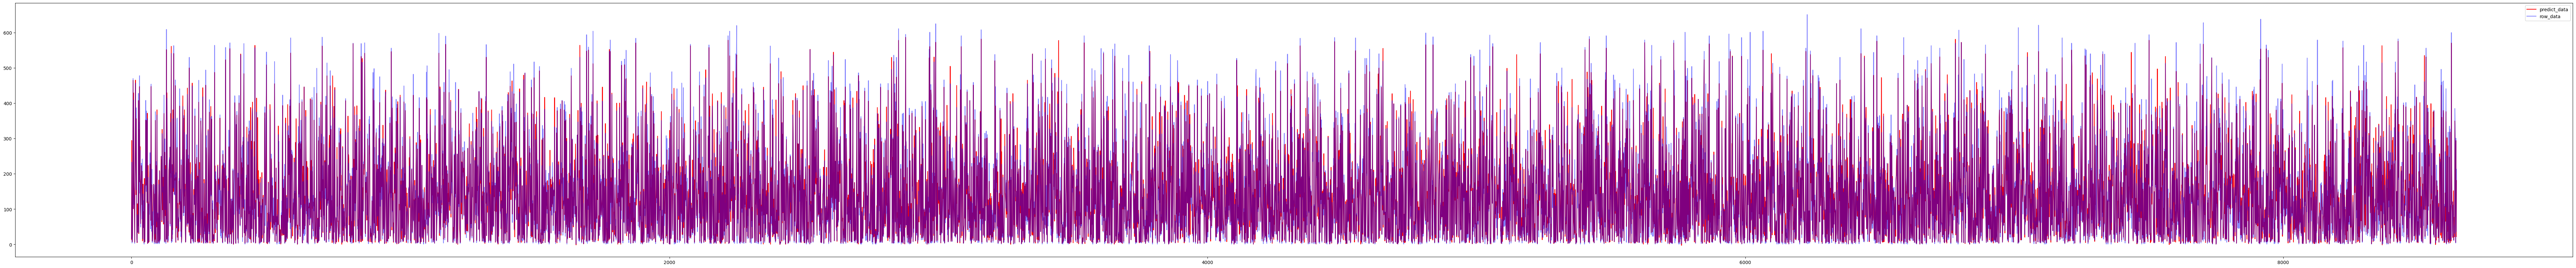

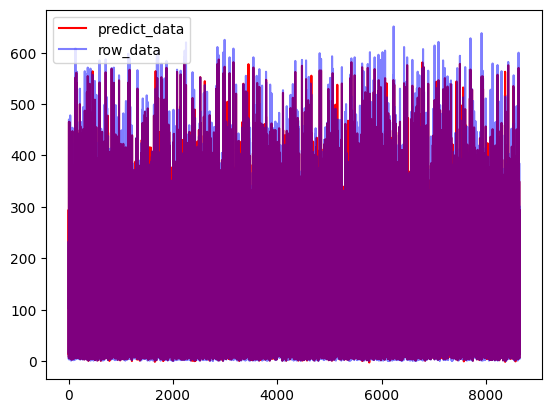

In [23]:
plt.figure(figsize=(100,10))
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
plt.show()

plt.figure()
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
plt.show()

546/546 [==============================] - 1s 2ms/step
[[37]
 [23]
 [19]
 ...
 [25]
 [22]
 [19]]
37
23
19
14
7
2
-1
-1
9
14
22
49
77
101
125
139
81
78
51
38
47
36
40
40
31
13
3
2
1
0
6
42
53
41
63
93
106
106
92
78
63
56
45
39
40
35
16
10
5
1
0
-1
-1
6
53
121
194
104
93
71
55
56
69
96
147
126
91
63
48
34
16
8
4
0
-3
-2
-1
5
49
128
199
121
105
74
64
62
73
116
192
171
125
81
61
46
32
13
8
1
0
-2
0
5
60
141
207
166
159
92
87
86
106
159
207
166
136
104
64
50
44
23
12
2
0
1
0
7
52
128
222
158
159
117
113
134
158
191
215
182
149
129
105
80
79
30
30
20
13
9
1
1
4
24
33
40
55
78
97
117
141
123
121
143
143
123
94
83
70
34
21
15
13
7
3
5
6
11
21
35
67
94
116
130
126
117
88
66
52
38
26
26
20
13
6
4
3
3
-1
4
49
106
237
126
121
106
91
62
69
68
99
64
53
50
39
26
17
10
5
1
-3
-1
1
43
105
205
100
140
123
106
101
118
163
207
183
140
89
62
46
27
18
7
1
0
-2
0
7
70
149
191
123
110
83
78
68
75
120
80
89
68
43
25
25
16
13
9
1
-1
-2
-2
1
70
174
263
156
135
81
90
91
117
187
242
194
139
112
101
68
59
24
14
7
1

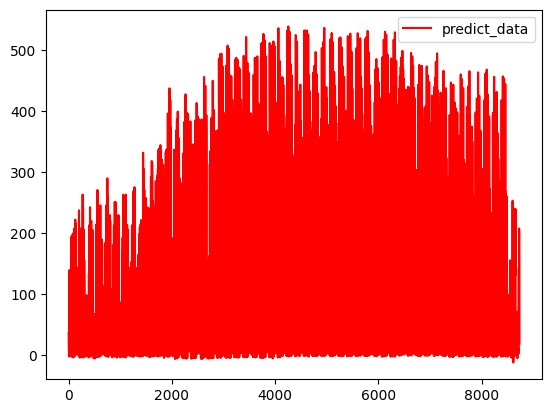

In [10]:
predictedz = model.predict(z,batch_size=16)
zzzzzz = predictedz.astype("int32")
print(zzzzzz)
for i in range(0,8733):
    print(zzzzzz[i,0])
print(np.shape(zzzzzz))

plt.figure()
plt.plot(range(0,len(zzzzzz)),predictedz, color="r", label="predict_data")
plt.legend()
plt.show()